# 1.Importation des bibliothèques
 
 
&nbsp; 
**ciw bibliothèque de SED des files d'attentes** 

&nbsp;
**pandas pour  manipuler le listing** 

&nbsp;
**matplotlib pour représentation graphiques**

&nbsp;
**numpy pour les calcules numériques**

&nbsp;
**math réalisation des opérations Arithmétiques** 

&nbsp;
**seaborn Bibliothèque de la Data_Visualisation**  


In [8]:

import ciw 
import pandas as pd 
from pandas import DataFrame
import matplotlib as plt 
import numpy as np #Calcules numériques  
import matplotlib.pyplot as plt#Représentation Graphiques
%matplotlib inline
import math #Réalisation des opération mathématiques 
import matplotlib.pyplot as plt 
import seaborn as sns #Bibliothèque de la Data_Visualisation  
from collections import Counter


# 2.Création du réseaux des files d'attentes 
&nbsp;
**Classe 0 désigne les clients de type A**

&nbsp;
**Classe 1 désigne les clients de type B**

&nbsp;
**Chaque guichet a un seul employé**

&nbsp;
**La matrice de routage est aussi mentionnée**

&nbsp;
**Ici on a pas mentionné la capacité c'est par défaut infinie en cas de besoin ci dessous la syntaxe munie d'un exemple** 

&nbsp;
queue_capacities=[5, float('inf'), float('inf'), 10]**

&nbsp;
***Il convient de noter qu'il existe toutes les autres lois dans la bibliothèques Ciw :**


In [9]:
N = ciw.create_network(
    #Classe 0 désigne les clients de type A 
     #Classe 1 désigne les clients de type B
     arrival_distributions={'Class 0': [ciw.dists.Exponential(8)],
                            'Class 1': [ciw.dists.Exponential(17)]},
     service_distributions={'Class 0': [ciw.dists.Exponential(20)],
                            'Class 1': [ciw.dists.Exponential(30)]},
    routing={'Class 0': [[1.0]],
             'Class 1': [[1.0]]},
    #Vecteur des probailités de changements
    class_change_matrices={'Node 1': [[0.5, 0.5],
                                     [0.75, 0.25]]},
    #Chaque guichet possède un seul employé
    number_of_servers=[1])


# 3.Lancement de la simulation 
**Horizon de la simulation est fixé a 10000 unités** 

&nbsp;
**Vue que l'exécution prends beaucoup de temps on a décidé de :**


&nbsp;
$\color{red}{\text{On changera cet horizon demandée par 500 unités}}$

In [10]:
ciw.seed(1)
Q = ciw.Simulation(N)
#Horizon de simulations
#Q.simulate_until_max_time(10000.0)
Q.simulate_until_max_time(500.0)

# 4.Collecter la Data communément appelé "Listing"


In [11]:
DATA= Q.get_all_records()

In [12]:
DATA

[Record(id_number=341, customer_class=0, node=1, arrival_date=13.864202318937666, waiting_time=15.766565649087232, service_start_date=29.630767968024898, service_time=0.08260641943935099, service_end_date=29.71337438746425, time_blocked=0.0, exit_date=29.71337438746425, destination=1, queue_size_at_arrival=340, queue_size_at_departure=749),
 Record(id_number=341, customer_class=1, node=1, arrival_date=29.71337438746425, waiting_time=31.661843518360484, service_start_date=61.375217905824734, service_time=0.023170610975839168, service_end_date=61.39838851680057, time_blocked=0.0, exit_date=61.39838851680057, destination=1, queue_size_at_arrival=749, queue_size_at_departure=1504),
 Record(id_number=341, customer_class=1, node=1, arrival_date=61.39838851680057, waiting_time=62.9923982780601, service_start_date=124.39078679486067, service_time=0.03514766141788073, service_end_date=124.42593445627855, time_blocked=0.0, exit_date=124.42593445627855, destination=1, queue_size_at_arrival=1504, 

# 5.Restituer la donnée aquise 
***Comme vous remarquez en haut le listing fourni en une liste de tuples ce qui n'est pas réutilisable par la suite*** 


&nbsp;
***La bibliothèque pandas nous permettra d'organiser les données dans un tableau format CSV qu'on va convertir en format xls a l'aide Power Query***

In [13]:
df = pd.DataFrame(DATA, columns =['id_number',"customer_class","node",
                                  "arrival_date","waiting_time","service_start_date",
                                  "service_time","service_end_date","time_blocked",
                                  "exit_date","destination","queue_size_at_arrival",
                                  "queue_size_at_departure"])

In [14]:
df


,id_number,customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure
0,341,0,1,13.864202,15.766566,29.630768,0.082606,29.713374,0.0,29.713374,1,340,749
1,341,1,1,29.713374,31.661844,61.375218,0.023171,61.398389,0.0,61.398389,1,749,1504
2,341,1,1,61.398389,62.992398,124.390787,0.035148,124.425934,0.0,124.425934,1,1504,3058
3,341,0,1,124.425934,122.300761,246.726696,0.142225,246.868920,0.0,246.868920,1,3058,6048
4,3060,1,1,124.439122,122.429798,246.868920,0.062520,246.931440,0.0,246.931440,1,3059,6050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,6045,0,1,246.708942,253.118210,499.827151,0.015678,499.842829,0.0,499.842829,1,6044,12285
11995,3059,1,1,124.396233,122.224179,246.620412,0.106283,246.726696,0.0,246.726696,1,3058,6044
11996,3059,1,1,246.726696,253.116133,499.842829,0.033187,499.876016,0.0,499.876016,1,6044,12288
11997,6046,1,1,246.758080,253.117936,499.876016,0.118064,499.994081,0.0,499.994081,1,6045,12290


 # 6.Afficher le Dataframe 

In [15]:
print(df)

       id_number  customer_class  node  arrival_date  waiting_time  \
0            341               0     1     13.864202     15.766566   
1            341               1     1     29.713374     31.661844   
2            341               1     1     61.398389     62.992398   
3            341               0     1    124.425934    122.300761   
4           3060               1     1    124.439122    122.429798   
...          ...             ...   ...           ...           ...   
11994       6045               0     1    246.708942    253.118210   
11995       3059               1     1    124.396233    122.224179   
11996       3059               1     1    246.726696    253.116133   
11997       6046               1     1    246.758080    253.117936   
11998       6047               1     1    246.773794    253.220287   

       service_start_date  service_time  service_end_date  time_blocked  \
0               29.630768      0.082606         29.713374           0.0   
1        

# 7.Exporter les données

In [16]:
df.to_csv ('DATA.csv', index = False , header=True)
df
df.to_csv('DATA.csv')

# 8.Aficher le Dataframe 

In [17]:

df=df.rename(columns={"Unnamed: 1":"time"})



In [18]:
df


,id_number,customer_class,node,arrival_date,waiting_time,service_start_date,service_time,service_end_date,time_blocked,exit_date,destination,queue_size_at_arrival,queue_size_at_departure
0,341,0,1,13.864202,15.766566,29.630768,0.082606,29.713374,0.0,29.713374,1,340,749
1,341,1,1,29.713374,31.661844,61.375218,0.023171,61.398389,0.0,61.398389,1,749,1504
2,341,1,1,61.398389,62.992398,124.390787,0.035148,124.425934,0.0,124.425934,1,1504,3058
3,341,0,1,124.425934,122.300761,246.726696,0.142225,246.868920,0.0,246.868920,1,3058,6048
4,3060,1,1,124.439122,122.429798,246.868920,0.062520,246.931440,0.0,246.931440,1,3059,6050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,6045,0,1,246.708942,253.118210,499.827151,0.015678,499.842829,0.0,499.842829,1,6044,12285
11995,3059,1,1,124.396233,122.224179,246.620412,0.106283,246.726696,0.0,246.726696,1,3058,6044
11996,3059,1,1,246.726696,253.116133,499.842829,0.033187,499.876016,0.0,499.876016,1,6044,12288
11997,6046,1,1,246.758080,253.117936,499.876016,0.118064,499.994081,0.0,499.994081,1,6045,12290


# 9.Nombre  total des clients réparties en deux à l'issue de la simulation 

In [19]:

Counter([client.customer_class for client in DATA])

Counter({0: 5623, 1: 6376})

In [20]:
print("On a 5623 clients de type A \n On a 6376 clients de types B ")

On a 5623 clients de type A 
 On a 6376 clients de types B 


# 10.Etude de la stabilité du système 

In [21]:
#taux d'ocupation noté gho
print("le taux d'ocuppation de la file du guichet 1 est : ",8/20)


le taux d'ocuppation de la file du guichet 1 est :  0.4


In [22]:
print("le taux d'ocuppation de la file du guichet 2 est : ",17/30)


le taux d'ocuppation de la file du guichet 2 est :  0.5666666666666667


__On conclue donc que le réseaux est stable puisque les deux taux d'occupation sont inférieurs à 1__ 

In [26]:
system_times=[client.service_end_date-client.arrival_date for client in DATA]
moyenne_system_times=sum(system_times)/len(system_times)

# 12.Représentation du pourcentage d'activité des serveurs 

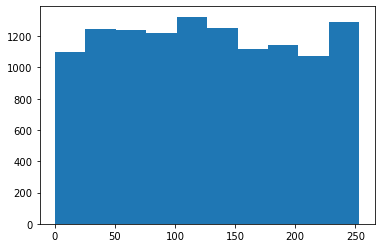

Pourcentage d'activité des serveurs :  0.9999639272339726


In [27]:
plt.hist(system_times);
plt.show()

print ("Pourcentage d'activité des serveurs :  "+str(Q.transitive_nodes[0].server_utilisation))

# 13 Calcul de la durée Moyenne de séjour d'un client dans le système 

###                                                        Méthode : 1

In [28]:
df_system_times=df["service_end_date"]-df["arrival_date"]

In [29]:
df_system_times


0         15.849172
1         31.685014
2         63.027546
3        122.442986
4        122.492318
            ...    
11994    253.133887
11995    122.330462
11996    253.149321
11997    253.236001
11998    253.224306
Length: 11999, dtype: float64

In [30]:
y=df_system_times.mean()

In [31]:
print("Le temps moyen de séjour d un client est :",y)



Le temps moyen de séjour d un client est : 126.34692848149247


### Méthode : 2 

In [32]:
x=(df["service_time"]+df["waiting_time"]).mean()

In [33]:
print("Le temps moyen de séjour d un client est :",x)

Le temps moyen de séjour d un client est : 126.34692848149247


### Comparaison 

In [34]:
print("la différence entre les résultats des deux méthode :")
print(x-y)
print("Puisque la différence est nulle on conclue que les deux méthodes sont equivalentes ")


la différence entre les résultats des deux méthode :
0.0
Puisque la différence est nulle on conclue que les deux méthodes sont equivalentes 


# 14. Le nombre moyen de clients dans chaque catégorie 

In [36]:
N_A=(0.4/0.6)
print("le nombre moyen de client dans la file 1 est :",N_A )

le nombre moyen de client dans la file 1 est : 0.6666666666666667


In [37]:
N_B=(0.56/0.44)
print("le nombre moyen de client dans la file 1 est :",N_B )

le nombre moyen de client dans la file 1 est : 1.272727272727273
